In [542]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.decomposition import NMF
from nltk.stem.snowball import SnowballStemmer
import matplotlib.pyplot as plt 

In [523]:
import pickle
file = open('all_musical_df_old.pkl','rb')
all_musical_df_old = pickle.load(file)

file = open('more_musicals_df_old.pkl','rb')
more_musicals_df_old = pickle.load(file)

file = open('all_musical_df_real.pkl','rb')
all_musical_df_real = pickle.load(file)

file = open('more_musicals_df_real.pkl','rb')
more_musicals_df_real = pickle.load(file)


In [578]:
file = open('just_sondheim.pkl','rb')
just_sondheim = pickle.load(file)

### Word EDA

In [553]:
#establish and add on to stop words
st_words = stopwords.words('english')

my_words = (['instrumental', 'entr','acte','finale','prologue','prologu','overtue','one','two','three','spoken','insatrumental','like',
            'edie','edith','sung','overture','joseph','silvia','proteus','da','ba','dum','dat','doo','dee','tra','la',
            'narrator','c','e','ti', 'reprise','instrument','abov', 'act', 'ani', 'becaus', 'befor', 'doe', 'dure', 'edi', 'final', 
             'insatrument', 'narrat', 'onc', 'onli', 'ourselv', 'overtu', 'overtur', 'repris', "should'v", 'themselv', 'veri', 'whi', 
             "you'r", "you'v", 'yourselv','georg','dot','jimmi','moun','insatru', 'repri','ta','im','ya','moune','mama','oh'])
st_words.extend(my_words)

In [537]:
#remove stop words from tokened lyrics
def rm_stword(df, st_words):
    for i in df.index:
        df['tokened_lyrics'][i] = [word for word in df['tokened_lyrics'][i] if word not in st_words]
    return df
#for i in range(len(more_musicals_df_old)):
#    more_musicals_df_old['tokened_lyrics_st'][i] = [word for word in more_musicals_df_old['tokened_lyrics'][i] if word not in st_words]

In [538]:

rm_stword(all_musical_df_real, st_words)

/Users/noramay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,titles,descriptions,song_lyrics,dates,song_lyrics_pro,tokened_lyrics,set_tokened_lyrics,num_words,unique_words,song_lyrics_forPOS,tokens_forPOS,POS_tags,unique_POS_tags
1,Oklahoma,"""Oklahoma"" Synopsis - Broadway musical ...","Oh, What a Beautiful Morning ...",1943.0,oh what a beautiful morning ...,"[oh, beautiful, morning, bright, golden, haze,...","{meadow, haze, everything, music, sky, oh, hea...",187,75,"Oh, What a Beautiful Morning ...","[Oh, ,, What, a, Beautiful, Morning, There, 's...","[(Oh, UH), (,, ,), (What, WP), (a, DT), (Beaut...","{(the, DT), (as, RB), (willer, NN), (!, .), (T..."
2,Oklahoma,"""Oklahoma"" Synopsis - Broadway musical ...",Laurey's Entrance Laurey: ...,1943.0,laurey s entrance oh wh...,"[laurey, entrance, oh, beautiful, mornin, oh, ...","{entrance, everything, oh, i, feelin, beautifu...",29,20,"Laurey's Entrance Oh, wh...","[Laurey, 's, Entrance, Oh, ,, what, a, beautif...","[(Laurey, NNP), ('s, POS), (Entrance, NNP), (O...","{(Mornin, NNP), (thought, VBD), (--, :), (!, ...."
3,Oklahoma,"""Oklahoma"" Synopsis - Broadway musical ...",Surrey With the Fringe on Top ...,1943.0,surrey with the fringe on top ...,"[surrey, fringe, top, take, tonight, honey, wa...","{strutters, lark, out, top, ain, thinkin, stop...",458,209,Surrey With the Fringe on Top ...,"[Surrey, With, the, Fringe, on, Top, When, I, ...","[(Surrey, NNP), (With, IN), (the, DT), (Fringe...","{(moo, VB), ('m, VBP), (curtains, NNS), (the, ..."
4,Oklahoma,"""Oklahoma"" Synopsis - Broadway musical ...",Kansas City Will: I got to...,1943.0,kansas city i got to kan...,"[kansas, city, got, kansas, city, frid, sattid...","{or, skyscraper, put, gals, went, complete, ti...",312,147,Kansas City I got to Kan...,"[Kansas, City, I, got, to, Kansas, City, on, a...","[(Kansas, NNP), (City, NNP), (I, PRP), (got, V...","{(heel, NN), (comin, NN), (the, DT), (as, RB),..."
5,Oklahoma,"""Oklahoma"" Synopsis - Broadway musical ...",I Cain't Say No Annie: It ...,1943.0,i cain t say no it ain t...,"[cain, say, much, question, knowin, knowed, ri...","{or, put, ain, terrible, time, payin, late, ha...",408,195,I Cain't Say No It ain't...,"[I, Cai, n't, Say, No, It, ai, n't, so, much, ...","[(I, PRP), (Cai, VBP), (n't, RB), (Say, NNP), ...","{(lose, VBP), ('m, VBP), (Romeo, NNP), (the, D..."
6,Oklahoma,"""Oklahoma"" Synopsis - Broadway musical ...",Many a New Day Laurey: Why...,1943.0,many a new day why shoul...,"[many, new, day, woman, healthy, strong, blubb...","{buy, asked, among, away, find, mesomebody, ne...",363,123,Many a New Day Why shoul...,"[Many, a, New, Day, Why, should, a, woman, who...","[(Many, JJ), (a, DT), (New, NNP), (Day, NNP), ...","{(Never, NNP), (brush, VB), (lose, VBP), (the,..."
8,Oklahoma,"""Oklahoma"" Synopsis - Broadway musical ...",It's a Scandal! It's a Outrage! ...,1943.0,it s a scandal it s a outrage ...,"[scandal, outrage, oh, trapped, tricked, hoodb...","{wild, husband, our, oh, ain, around, harm, ru...",386,190,It's a Scandal! It's a Outrage! ...,"[It, 's, a, Scandal, !, It, 's, a, Outrage, !,...","[(It, PRP), ('s, VBZ), (a, DT), (Scandal, NN),...","{('m, VBP), (the, DT), (Nell, NNP), (ashes, NN..."
9,Oklahoma,"""Oklahoma"" Synopsis - Broadway musical ...",People Will Say We're in Love ...,1943.0,people will say we re in love ...,"[people, say, love, think, stories, link, name...","{our, prove, bake, people, untrue, tree, hand,...",267,121,People Will Say We're in Love ...,"[People, Will, Say, We, 're, in, Love, Why, do...","[(People, NNS), (Will, NNP), (Say, NNP), (We, ...","{(the, DT), (as, RB), ('ll, MD), (behind, IN),..."
10,Oklahoma,"""Oklahoma"" Synopsis - Broadway musical ...",Pore Jud Is Daid Curly: Po...,1943.0,pore jud is daid pore ju...,"[pore, jud, daid, pore, jud, daid, pore, jud, ...","{ice, acrost, our, mean, oh, barns, daisies, o...",397,188,Pore Jud Is Daid Pore Ju...,"[Pore, Jud, Is, Daid, Pore, Jud, is, daid, ,, ...","[(Pore, NNP), (Jud, NNP), (Is, NNP), (Daid, NN...","{(which, WDT), (the, DT), (), )), (as, RB),

In [539]:
rm_stword(more_musicals_df_real, st_words)

/Users/noramay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,titles,descriptions,song_lyrics,song_lyrics_pro,tokened_lyrics,set_tokened_lyrics,unique_words,dates,song_lyrics_forPOS,tokens_forPOS,POS tags,POS_tags,unique_POS_tags,num_words
0,"Phantom of the Opera, The","""Phantom of the Opera, The"" Synopsis - Broadwa...",Prologue AUCTIONEER (spok...,prologue spoken sold ...,"[sold, number, sir, thank, lot, ladies, poster...","{figurine, our, immense, raoul, mystery, bid, ...",204,1986.0,Prologue (spoken) Sold....,"[Prologue, (, spoken, ), Sold, ., Your, number...","[(Prologue, NNP), ((, (), (spoken, VBN), (), )...","[(Prologue, NNP), ((, (), (spoken, VBN), (), )...","{(which, WDT), (restored, VBN), (the, DT), (),...",388
1,"Phantom of the Opera, The","""Phantom of the Opera, The"" Synopsis - Broadwa...",Overture/Hannibal CARLOTTA...,overture hannibal this...,"[hannibal, trophy, saviours, saviours, enslavi...","{our, firmin, tremble, hark, dancing, bid, dee...",217,1986.0,Overture/Hannibal : This...,"[Overture/Hannibal, :, This, trophy, from, our...","[(Overture/Hannibal, NN), (:, :), (This, DT), ...","[(Overture/Hannibal, NN), (:, :), (This, DT), ...","{(return, VB), (sends, VBZ), ('m, VBP), (the, ...",393
2,"Phantom of the Opera, The","""Phantom of the Opera, The"" Synopsis - Broadwa...",Think of Me CHRISTINE: Thi...,think of me think of me...,"[think, think, think, fondly, said, goodbye, r...","{or, remember, our, put, stop, find, trying, s...",107,1986.0,Think of Me : Think of me...,"[Think, of, Me, :, Think, of, me, ,, think, of...","[(Think, NN), (of, IN), (Me, NNS), (:, :), (Th...","[(Think, NN), (of, IN), (Me, NNS), (:, :), (Th...","{(the, DT), (as, RB), (innocent, JJ), (young, ...",204
3,"Phantom of the Opera, The","""Phantom of the Opera, The"" Synopsis - Broadwa...",Angel of Music PHANTOM Br...,angel of music bravi b...,"[angel, music, bravi, bravi, bravissimi, chris...","{prefer, mother, longer, around, meg, genius, ...",156,1986.0,"Angel of Music Bravi, b...","[Angel, of, Music, Bravi, ,, bravi, ,, braviss...","[(Angel, NNP), (of, IN), (Music, NNP), (Bravi,...","[(Angel, NNP), (of, IN), (Music, NNP), (Bravi,...","{(Somewhere, NNP), (the, DT), (angel, NN), (dy...",294
4,"Phantom of the Opera, The","""Phantom of the Opera, The"" Synopsis - Broadwa...",Little Lotte/The Mirror Li...,little lotte the mirror li...,"[little, lotte, mirror, little, lotte, little,...","{or, lotte, longer, read, oh, raoul, songs, ig...",141,1986.0,Little Lotte/The Mirror Li...,"[Little, Lotte/The, Mirror, Little, Lotte, Lit...","[(Little, JJ), (Lotte/The, NNP), (Mirror, NNP)...","[(Little, JJ), (Lotte/The, NNP), (Mirror, NNP)...","{('m, VBP), (Those, DT), (supper, VB), (the, D...",421
5,"Phantom of the Opera, The","""Phantom of the Opera, The"" Synopsis - Broadwa...",The Phantom of the Opera C...,the phantom of the opera ...,"[phantom, opera, sleep, sang, dreams, came, vo...","{draw, face, our, speaks, music, sleep, seen, ...",68,1986.0,The Phantom of the Opera ...,"[The, Phantom, of, the, Opera, In, sleep, he, ...","[(The, DT), (Phantom, NNP), (of, IN), (the, DT...","[(The, DT), (Phantom, NNP), (of, IN), (the, DT...","{(Those, DT), (the, DT), (sang, VBD), (behind,...",153
6,"Phantom of the Opera, The","""Phantom of the Opera, The"" Synopsis - Broadwa...",Music of the Night Night t...,music of the night night t...,"[music, night, night, time, sharpens, heighten...","{tremulous, time, defenses, sensation, away, p...",121,1986.0,Music of the Night Night t...,"[Music, of, the, Night, Night, time, sharpens,...","[(Music, NNP), (of, IN), (the, DT), (Night, NN...","[(Music, NNP), (of, IN), (the, DT), (Night, NN...","{(which, WDT), (Let, NNP), (the, DT), (sense, ...",227
7,"Phantom of the Opera, The","""Phantom of the Opera, The"" Synopsis - Broadwa...",Magical Lasso Like yellow ...,magical lasso like yellow ...,"[magical, lasso, yellow, parchment, skin, grea...","{or, wise, tongue, guard, his, silence, eyes, ...",51,1986.0,Magical Lasso Like yellow ...,"[Magical, Lasso, Like, yellow, parchment, is, ...","[

In [540]:
#get frequencies of indiv words after stop words have been removed using rm_stword
def freq_word(df):
    fdist = []
    word_list = df.tokened_lyrics.tolist()
    flat_list = [item for sublist in word_list for item in sublist]
    fdist = nltk.FreqDist(flat_list)
    return fdist

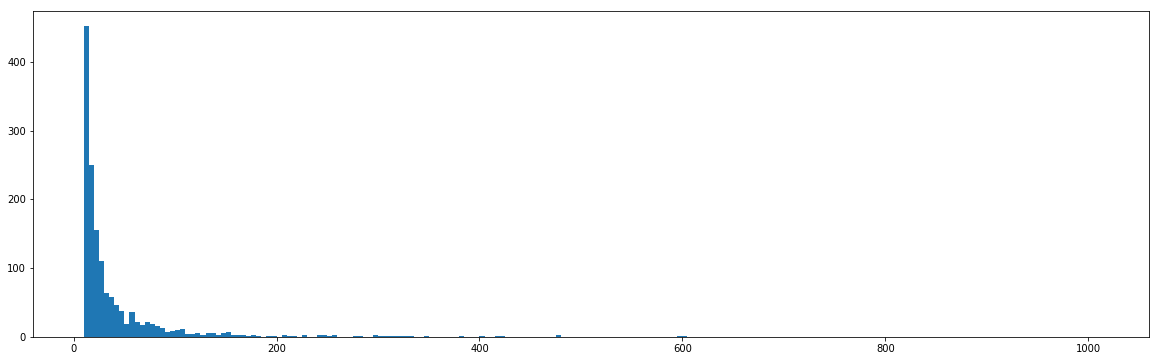

In [550]:
fdist = freq_word(all_musical_df_real)
plt.figure(figsize=(20,6))
plt.hist(fdist.values(), bins = 200, range = (10,1010));

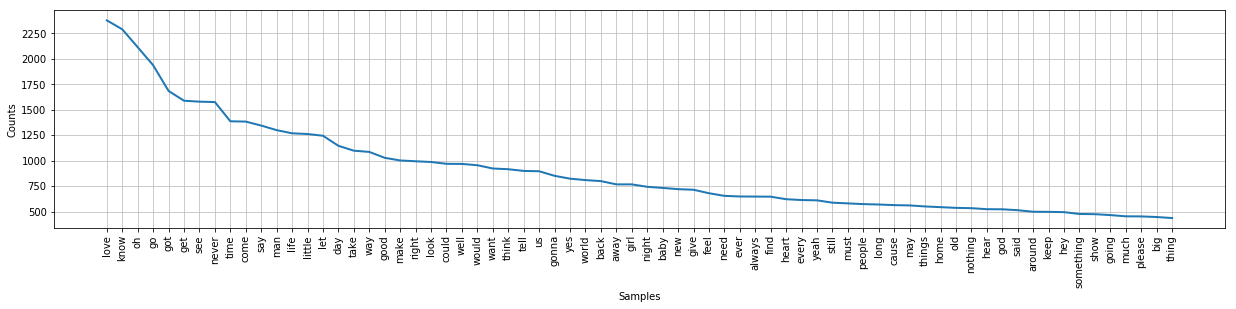

In [623]:
plt.figure(figsize=(21,4))
fdist.plot(70,cumulative=False)

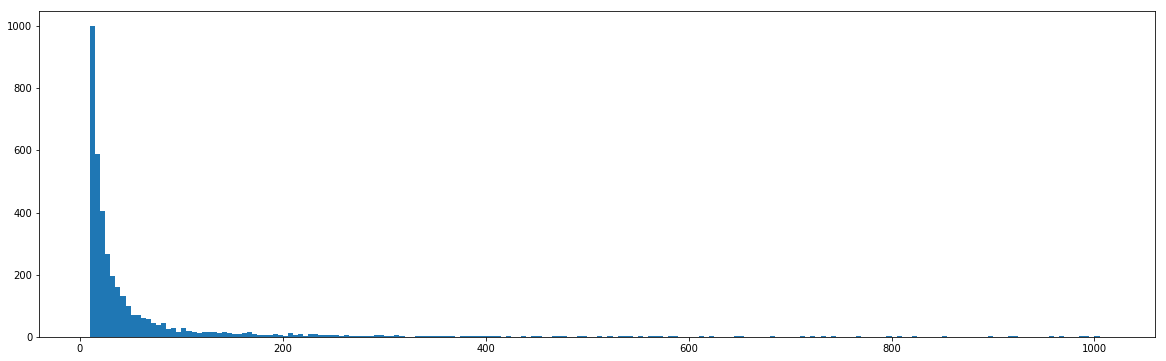

In [551]:
fdist = freq_word(more_musicals_df_real)
plt.figure(figsize=(20,6))
plt.hist(fdist.values(), bins = 200, range = (10,1010));

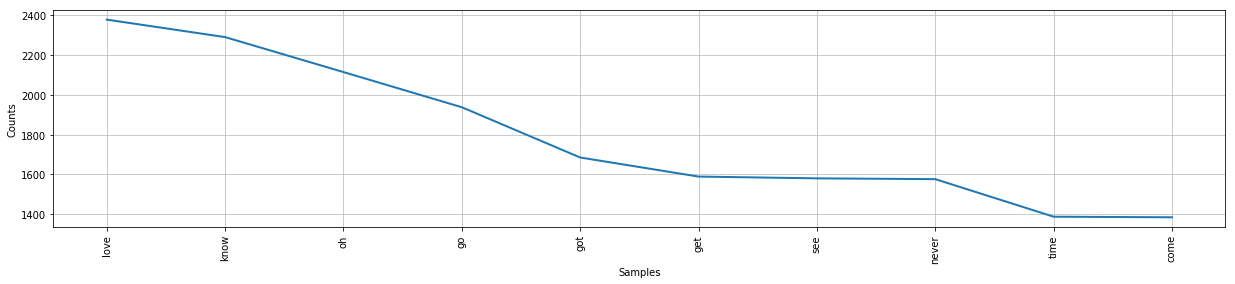

AttributeError: 'FreqDist' object has no attribute 'samples'

In [631]:
plt.figure(figsize=(21,4))

fdist.plot(10,cumulative=False)


In [633]:
fdist.most_common(10)

[('love', 2379),
 ('know', 2291),
 ('oh', 2115),
 ('go', 1938),
 ('got', 1685),
 ('get', 1589),
 ('see', 1580),
 ('never', 1576),
 ('time', 1387),
 ('come', 1384)]

### Vectorize and Model

In [1]:
import pytesseract


In [2]:
pytesseract.get_tesseract_version()


LooseVersion ('4.0.0')

In [559]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [591]:
def get_topics(text, n_topics, my_st_words, my_max_df, my_min_df):
    vectorizer = (TfidfVectorizer(stop_words = my_st_words, tokenizer = tokenize, 
                                 analyzer='word', token_pattern="\\b[a-z]{3,}\\b", max_df=my_max_df, min_df=my_min_df))
    X = vectorizer.fit_transform(text)
    words = np.array(vectorizer.get_feature_names())

    model = NMF(n_components=n_topics)
    doc_topics = model.fit_transform(X)
    C = model.components_

    for topic_idx, topic in enumerate(C):
        print("Topic #%d:" % topic_idx)
        print(" ".join([words[i]
                    for i in topic.argsort()[:-10 - 1:-1]]))
        print()

In [628]:
get_topics(more_musicals_df_real['song_lyrics_pro'], 8, st_words,0.5, 5)

Topic #0:
know go time say could would want tell think see

Topic #1:
love want heart true never tell care without alway tomorrow

Topic #2:
got babi gonna yeah get come gotta take big caus

Topic #3:
dream true star come seem believ everi could boy wonder

Topic #4:
girl littl beauti get boy danc miss big pretti wait

Topic #5:
goodby hello go farewel long bye america spell old bell

Topic #6:
day life world new night light live sing come song

Topic #7:
man woman old king men ladi never lord big marri



In [583]:
len(just_sondheim)

318

In [616]:
rh_st_words = stopwords.words('english')

my_words = (['instrumental', 'entr','acte','finale','prologue','prologu','overtue','one','two','three','spoken','insatrumental','like',
            'edie','edith','sung','overture','joseph','silvia','proteus','da','ba','dum','dat','doo','dee','tra','la',
            'narrator','c','e','ti', 'reprise','instrument','abov', 'act', 'ani', 'becaus', 'befor', 'doe', 'dure', 'edi', 'final', 
             'insatrument', 'narrat', 'onc', 'onli', 'ourselv', 'overtu', 'overtur', 'repris', "should'v", 'themselv', 'veri', 'whi', 
             "you'r", "you'v", 'yourselv','georg','dot','jimmi','moun','insatru', 'repri','ta','im','ya','moune','mama','oh',
            'rizzolli','augenti','torasso','sweeney','todd','barber','mr','lovett','johanna','fleet','demon','shave',
            'rose','june','louis','herbi','sunday','anna','hamilton','burr','dont','giorgio','fosca', 'clara', 'colonel','rizzolli','augenti'
             'torasso', 'barri','wilson','addison','nelli','bounc','willi','holli','addi','rose','momma','herbi','louis','june','gypsi',
            'sweeney','todd','lovett','mr','barber','sir','johanna','sweeni','shave','fleet','shaw','evo','alalai','wine','dionyso',
             'alalalalalalai','bring','frog','hade','toni','bobbi','celest','athen','ariadn','xanthia','centaur','maria','doctor',
             'soldier','signora','captain', 'letter','gotta','ah','gonna','lombardi'])
rh_st_words.extend(my_words)


In [621]:
get_topics(just_sondheim['song_lyrics_pro'], 7, rh_st_words, 100, 10)

/Users/noramay/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['loui'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Topic #0:
would could life feel much happi woman leav must die

Topic #1:
got right everybodi peopl new happen dream mean need town

Topic #2:
bell ring men boat row earth sky stop talk heart

Topic #3:
pleas music us speak smile resum stop play hear audienc

Topic #4:
girl wait beauti pretti smile hey boy friend stay home

Topic #5:
travel wood hate chang moment deep wish depress straight along

Topic #6:
tonight someth noth free tomorrow kiss rememb earth may lover



In [576]:
rh_st_words = stopwords.words('english')

my_words = (['instrumental', 'entr','acte','finale','prologue','prologu','overtue','one','two','three','spoken','insatrumental','like',
            'edie','edith','sung','overture','joseph','silvia','proteus','da','ba','dum','dat','doo','dee','tra','la',
            'narrator','c','e','ti', 'reprise','instrument','abov', 'act', 'ani', 'becaus', 'befor', 'doe', 'dure', 'edi', 'final', 
             'insatrument', 'narrat', 'onc', 'onli', 'ourselv', 'overtu', 'overtur', 'repris', "should'v", 'themselv', 'veri', 'whi', 
             "you'r", "you'v", 'yourselv','georg','dot','jimmi','moun','insatru', 'repri','ta','im','ya','moune','mama','oh',
            'rizzolli','augenti','torasso','sweeney','todd','barber','mr','lovett','johanna','fleet','demon','shave',
            'rose','june','louis','herbi','sunday','anna','hamilton','burr','dont','giorgio','fosca', 'clara'])
rh_st_words.extend(my_words)

get_topics(all_musical_df_real['song_lyrics_pro'], 8,rh_st_words, 0.2, 5)

/Users/noramay/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['loui'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Topic #0:
home sir yo hey gonna gotta em around enough new aliv stay presid father alexand peopl shot fight son happen

Topic #1:
girl fellow boy home fun smile hey around toni kind flower bad danc ha ben upstair men guy ry yeah

Topic #2:
beauti mornin feelin goin everyth wonder entranc ladi somebodi old hole bright speak london moral thought realli woman chang wife

Topic #3:
dream everi true happi arm rainbow mountain wonder loveli believ stay climb talk seem heart peopl close star live long

Topic #4:
doctor colonel barri lombardi signora soldier letter captain cousin music read bachetti happi leav room enter woman continu live drum

Topic #5:
marri momma pretti babi bobbi funni togeth peopl boy honey alway entertain women ladi small thank pictur lucki much children

Topic #6:
heart wish ah fli sing must wood kiss far night music much pleas hear shall sky mani tree rememb bird

Topic #7:
tonight someth gonna maria tomorrow toni stori may clown glass moral free rais round anoth love

In [577]:
all_musical_df_old.to_pickle('all_musical_df_old.pkl')
more_musicals_df_old.to_pickle('more_musicals_df_old.pkl')
more_musicals_df_real.to_pickle('more_musicals_df_real.pkl')
all_musical_df_real.to_pickle('all_musical_df_real.pkl')

### START WORKING HERE

In [498]:
H = pd.DataFrame(doc_topics.round(5),
             index = [e[:30] for e in more_musicals_df_old['song_lyrics']],
             columns = ["0","1","2","3","4","5","6","7"])
#H['topic_label'] = H.idxmax(axis=1)
#,
#label each song by it's two highest proportions? 
#graph each musical by its topics, like a graph for a musical and the most common topics in musicals for different years?

In [499]:
H = H.apply(lambda x: x/x.sum(), axis=1)

In [ ]:
titles_df = pd.DataFrame(more_musicals_df_old['titles']);

In [503]:
#normalized topics with song and musical labels
musicals_topic = pd.concat([titles_df.reset_index(drop=True),H.reset_index(drop=False)], axis =1)

In [ ]:
av_topic_df = highest_topic.groupby('titles').mean()

In [514]:
norm_topic_df_dates = av_topic_df.merge(df_dates, on = 'titles')

In [517]:
#normalized topics grouped and averaged per musical
norm_topic_df_dates.drop('musicals', axis=1, inplace = True)

In [519]:
norm_topic_df_dates.sort_values('dates')
#jesus visualize this some way

,titles,0,1,2,3,4,5,6,7,dates
8,Anything Goes,0.356475,0.032418,0.073610,0.072879,0.096044,0.081271,0.163732,0.123572,1934
69,Me and My Girl,0.434377,0.022902,0.029682,0.011750,0.223517,0.052687,0.131959,0.093126,1937
81,Pal Joey,0.566169,0.045056,0.022480,0.057187,0.140582,0.023945,0.049238,0.095344,1940
77,Oklahoma,0.290541,0.077781,0.105825,0.033271,0.223430,0.001113,0.072506,0.195534,1943
78,On The Town,0.355218,0.054995,0.050224,0.143896,0.203094,0.017901,0.065825,0.108847,1944
19,Carousel,0.311763,0.026456,0.086558,0.055007,0.251744,0.027775,0.110095,0.130603,1945
7,Annie Get Your Gun,0.345981,0.048751,0.063248,0.062222,0.212985,0.032832,0.143591,0.090391,1946
16,Brigadoon,0.541645,0.017480,0.109222,0.017057,0.041052,0.057829,0.178358,0.037358,1947
33,Finian's Rainbow,0.398055,0.047392,0.072541,0.033859,0.127637,0.022906,0.114020,0.183589,1947
57,"Kiss Me, Kate",0.388237,0.025607,0.114962,0.178779,0.109327,0.022116,0.105866,0.055107,1948


In [ ]:
#look at composition of words. Tag with parts of speach, look at word sets for songs.


In [509]:

#using these topic distributions for musicals, I could recommend another one
#bring in spotify music data to get their metrics for a song and then I can also see how similar musically they are?
#look at arc of topics over the course of the show

In [475]:
H.topic_label.value_counts()

0    1001
4     435
1     238
2     184
7     145
5      96
3      78
6      40
Name: topic_label, dtype: int64

In [483]:
df_dates['titles'] = df_dates['musicals']
df_dates.drop(labels = 'musicals',axis = 1)
df_dates.titles = df_dates.titles.str.strip();

In [463]:
av_topic_df = highest_topic.groupby('titles').mean()
av_topic_df['topic_label'] = av_topic_df.idxmax(axis=1)

In [464]:
av_topic_df.[words[i]
                    for i in topic.argsort()[:-10 - 1:-1]]))

,0,1,2,3,4,5,6,7,topic_label
titles,,,,,,,,,
1776,0.025994,0.003440,0.004029,0.007452,0.007654,0.002419,0.002934,0.016666,0
25th Annual Putnam County Spelling Bee,0.021833,0.030482,0.007577,0.000541,0.009540,0.001764,0.156741,0.010019,6
42nd Street,0.018966,0.009765,0.013990,0.029036,0.028331,0.005054,0.001844,0.019010,3
Aida,0.045402,0.031106,0.002968,0.014886,0.014018,0.010583,0.000403,0.002662,0
Ain't Misbehavin',0.018438,0.034305,0.008194,0.005394,0.054484,0.008647,0.001562,0.024480,4
Aladdin,0.044589,0.007036,0.009825,0.002259,0.027414,0.015264,0.001718,0.005487,0
Annie,0.022366,0.007910,0.036812,0.001399,0.037260,0.009822,0.000582,0.014362,4
Annie Get Your Gun,0.025248,0.016406,0.022985,0.006524,0.027226,0.007210,0.003376,0.016502,4
Anything Goes,0.024814,0.017555,0.012748,0.004180,0.016508,0.015524,0.020288,0.024169,0


In [467]:
df_dates.shape

(121, 2)

In [466]:
av_topic_df.topic_label.value_counts()

0    45
4    20
2    12
1     8
7     7
3     7
5     4
6     1
Name: topic_label, dtype: int64